In [1]:
# Dependencies
import requests 
import json
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from pathlib import Path



In [2]:
#Import CSV file containing all the rental data for each state (DC, VA, UT, IL, TX)

#data_files =  
dc_csv = Path("State_Rental_Data/DCRVAC.csv")
va_csv = Path("State_Rental_Data/VARVAC.csv")
ut_csv = Path("State_Rental_Data/UTRVAC.csv")
il_csv = Path("State_Rental_Data/ILRVAC.csv")
tx_csv = Path("State_Rental_Data/TXRVAC.csv")

#Convert state files into dataframes
dc_df = pd.read_csv(dc_csv, encoding='ISO-8859-1')
va_df = pd.read_csv(va_csv, encoding='ISO-8859-1')
ut_df = pd.read_csv(ut_csv, encoding='ISO-8859-1')
il_df = pd.read_csv(il_csv, encoding='ISO-8859-1')
tx_df = pd.read_csv(tx_csv, encoding='ISO-8859-1')

#Example 
dc_df.head()

,DATE,DCRVAC
0,1986-01-01,3.5
1,1987-01-01,4.8
2,1988-01-01,5.2
3,1989-01-01,5.1
4,1990-01-01,7.7


In [3]:
#Changing the columns to the name of the state
dc_df.rename(columns={'DCRVAC': 'District of Columbia'}, inplace=True)
va_df.rename(columns={'VARVAC': 'Virginia'}, inplace=True)
ut_df.rename(columns={'UTRVAC': 'Utah'}, inplace=True)
il_df.rename(columns={'ILRVAC': 'Illinois'}, inplace=True)
tx_df.rename(columns={'TXRVAC': 'Texas'}, inplace=True)

In [4]:
#merging dateframes on the Date
states_df = dc_df.merge(va_df, on = "DATE")
states_df = states_df.merge(ut_df, on = "DATE")
states_df = states_df.merge(il_df, on = "DATE")
states_df = states_df.merge(tx_df, on = "DATE")

#Example
states_df.head()

,DATE,District of Columbia,Virginia,Utah,Illinois,Texas
0,1986-01-01,3.5,6.0,21.5,6.9,16.2
1,1987-01-01,4.8,7.0,21.5,5.9,17.1
2,1988-01-01,5.2,7.3,25.8,6.9,14.5
3,1989-01-01,5.1,6.6,10.6,7.2,12.5
4,1990-01-01,7.7,5.8,12.6,6.1,9.7


In [5]:
#Cleaning up the column 'Date,' by removing the month and day. then assigning the values to a new column called year
states_df['Year'] = states_df['DATE'].str.split('-').str[0]

#Once we have 'Year' we remove 'DATE'
states_df = states_df.drop(columns='DATE')

#new dataframe
states_df.head()

,District of Columbia,Virginia,Utah,Illinois,Texas,Year
0,3.5,6.0,21.5,6.9,16.2,1986
1,4.8,7.0,21.5,5.9,17.1,1987
2,5.2,7.3,25.8,6.9,14.5,1988
3,5.1,6.6,10.6,7.2,12.5,1989
4,7.7,5.8,12.6,6.1,9.7,1990


In [6]:
#Looking to see the data type of the cell values for each column
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District of Columbia  37 non-null     float64
 1   Virginia              37 non-null     float64
 2   Utah                  37 non-null     float64
 3   Illinois              37 non-null     float64
 4   Texas                 37 non-null     float64
 5   Year                  37 non-null     object 
dtypes: float64(5), object(1)
memory usage: 1.9+ KB


In [7]:
#Since year is an object we change the data type to interger 
states_df['Year'] = states_df['Year'].astype(int)


states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District of Columbia  37 non-null     float64
 1   Virginia              37 non-null     float64
 2   Utah                  37 non-null     float64
 3   Illinois              37 non-null     float64
 4   Texas                 37 non-null     float64
 5   Year                  37 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.9 KB


In [8]:
#Remove the rows that are not between 2010 and 2020
states_df = states_df[(states_df['Year'] > 2009)]
states_df = states_df[(states_df['Year'] < 2021)]

states_df

,District of Columbia,Virginia,Utah,Illinois,Texas,Year
24,9.0,10.5,7.2,11.0,13.3,2010
25,8.4,9.9,6.4,10.2,12.3,2011
26,7.8,9.5,7.7,9.5,10.4,2012
27,7.7,7.3,6.7,9.6,10.1,2013
28,6.5,7.4,8.6,9.2,9.5,2014
29,5.4,6.6,5.1,7.5,9.6,2015
30,5.8,7.0,5.7,7.6,9.4,2016
31,7.1,6.7,6.2,8.0,9.8,2017
32,7.9,6.5,5.4,7.4,8.9,2018
33,6.0,7.0,3.8,7.5,9.5,2019


In [9]:
#Setting the Index of the DataFrame
states_df = states_df.set_index('Year')

states_df

,District of Columbia,Virginia,Utah,Illinois,Texas
Year,,,,,
2010,9.0,10.5,7.2,11.0,13.3
2011,8.4,9.9,6.4,10.2,12.3
2012,7.8,9.5,7.7,9.5,10.4
2013,7.7,7.3,6.7,9.6,10.1
2014,6.5,7.4,8.6,9.2,9.5
2015,5.4,6.6,5.1,7.5,9.6
2016,5.8,7.0,5.7,7.6,9.4
2017,7.1,6.7,6.2,8.0,9.8
2018,7.9,6.5,5.4,7.4,8.9


In [10]:
#Rearranging the DataFrame so the columns are rows and the rows are columns.
states_df = states_df.transpose()
states_df

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
District of Columbia,9.0,8.4,7.8,7.7,6.5,5.4,5.8,7.1,7.9,6.0,8.2
Virginia,10.5,9.9,9.5,7.3,7.4,6.6,7.0,6.7,6.5,7.0,6.5
Utah,7.2,6.4,7.7,6.7,8.6,5.1,5.7,6.2,5.4,3.8,5.3
Illinois,11.0,10.2,9.5,9.6,9.2,7.5,7.6,8.0,7.4,7.5,7.9
Texas,13.3,12.3,10.4,10.1,9.5,9.6,9.4,9.8,8.9,9.5,8.6


In [11]:
#Resetting the index back to default, because this allows us to change the name of the states columns from 'Year' to 'State'
states_df2 = states_df.reset_index()
states_df2.head()

Year,index,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,District of Columbia,9.0,8.4,7.8,7.7,6.5,5.4,5.8,7.1,7.9,6.0,8.2
1,Virginia,10.5,9.9,9.5,7.3,7.4,6.6,7.0,6.7,6.5,7.0,6.5
2,Utah,7.2,6.4,7.7,6.7,8.6,5.1,5.7,6.2,5.4,3.8,5.3
3,Illinois,11.0,10.2,9.5,9.6,9.2,7.5,7.6,8.0,7.4,7.5,7.9
4,Texas,13.3,12.3,10.4,10.1,9.5,9.6,9.4,9.8,8.9,9.5,8.6


In [12]:
#Checking to see what columns we have. This was necessary because as you can see the years are still intergers
states_df2.columns

Index(['index', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020],
      dtype='object', name='Year')

In [17]:
#running a for loop to change the year columns in to strings
states_df2 = states_df2.rename(columns={year: str(year) for year in range(2010, 2021)})
states_df2.columns

Index(['index', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object', name='Year')

In [18]:
#renaming the states column
states_df3 = states_df2.rename(columns= {'index': 'States'})

#New Dataframe
states_df3

Year,States,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,District of Columbia,9.0,8.4,7.8,7.7,6.5,5.4,5.8,7.1,7.9,6.0,8.2
1,Virginia,10.5,9.9,9.5,7.3,7.4,6.6,7.0,6.7,6.5,7.0,6.5
2,Utah,7.2,6.4,7.7,6.7,8.6,5.1,5.7,6.2,5.4,3.8,5.3
3,Illinois,11.0,10.2,9.5,9.6,9.2,7.5,7.6,8.0,7.4,7.5,7.9
4,Texas,13.3,12.3,10.4,10.1,9.5,9.6,9.4,9.8,8.9,9.5,8.6


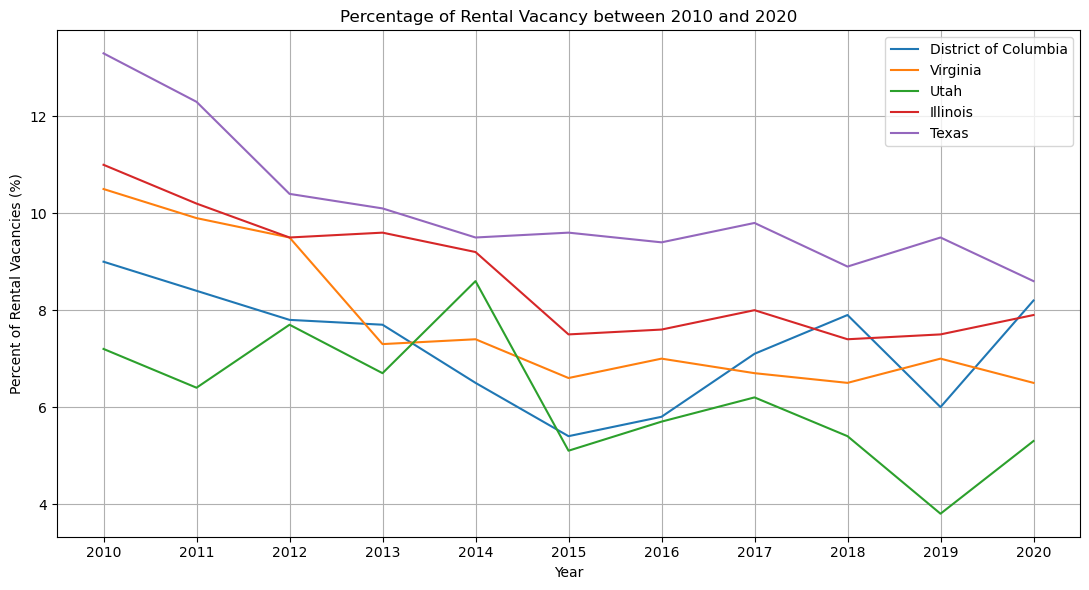

In [21]:
#Plotting a line graph to visuals the change of rental vacancy in the states
plt.figure(figsize=(11, 6))

#Starting a for loop for each of the states in the dataframe 
for state in states_df3['States']:
    #Filtering so the values are only in the row of the state we are looking at and storing this variable as state_data
    state_data = states_df3[states_df3['States'] == state]
    
    #Plotting cell values using iloc and going through the row, skipping the first column 
    plt.plot(state_data.columns[1:], state_data.iloc[0, 1:], label=state)

#Adding labels and a title to the graph
plt.title('Percentage of Rental Vacancy between 2010 and 2020')
plt.xlabel('Year')
plt.ylabel('Percent of Rental Vacancies (%)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()


#Saving the figure as a png file 
plt.savefig("rentalvacancygraphs/Fig1.png")

#Show the graph
plt.show()

In [22]:
#Repeating the same function to find the percentage change between the years. 
states_df3["Yearly Rental Vacancy Change 2011(%)"] = states_df3["2011"] / \
                                        states_df3["2010"]
states_df3["Yearly Rental Vacancy Change 2012(%)"] = states_df3["2012"] / \
                                        states_df3["2011"]
states_df3["Yearly Rental Vacancy Change 2013(%)"] = states_df3["2013"] / \
                                        states_df3["2012"]
states_df3["Yearly Rental Vacancy Change 2014(%)"] = states_df3["2014"] / \
                                        states_df3["2013"]
states_df3["Yearly Rental Vacancy Change 2015(%)"] = states_df3["2015"] / \
                                        states_df3["2014"]
states_df3["Yearly Rental Vacancy Change 2016(%)"] = states_df3["2016"] / \
                                        states_df3["2015"]
states_df3["Yearly Rental Vacancy Change 2017(%)"] = states_df3["2017"] / \
                                        states_df3["2016"]
states_df3["Yearly Rental Vacancy Change 2018(%)"] = states_df3["2018"] / \
                                        states_df3["2017"]
states_df3["Yearly Rental Vacancy Change 2019(%)"] = states_df3["2019"] / \
                                        states_df3["2018"]
states_df3["Yearly Rental Vacancy Change 2020(%)"] = states_df3["2020"] / \
                                        states_df3["2019"]

states_df3

Year,States,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Yearly Rental Vacancy Change 2011(%),Yearly Rental Vacancy Change 2012(%),Yearly Rental Vacancy Change 2013(%),Yearly Rental Vacancy Change 2014(%),Yearly Rental Vacancy Change 2015(%),Yearly Rental Vacancy Change 2016(%),Yearly Rental Vacancy Change 2017(%),Yearly Rental Vacancy Change 2018(%),Yearly Rental Vacancy Change 2019(%),Yearly Rental Vacancy Change 2020(%)
0,District of Columbia,9.0,8.4,7.8,7.7,6.5,5.4,5.8,7.1,7.9,...,0.933333,0.928571,0.987179,0.844156,0.830769,1.074074,1.224138,1.112676,0.759494,1.366667
1,Virginia,10.5,9.9,9.5,7.3,7.4,6.6,7.0,6.7,6.5,...,0.942857,0.959596,0.768421,1.013699,0.891892,1.060606,0.957143,0.970149,1.076923,0.928571
2,Utah,7.2,6.4,7.7,6.7,8.6,5.1,5.7,6.2,5.4,...,0.888889,1.203125,0.870130,1.283582,0.593023,1.117647,1.087719,0.870968,0.703704,1.394737
3,Illinois,11.0,10.2,9.5,9.6,9.2,7.5,7.6,8.0,7.4,...,0.927273,0.931373,1.010526,0.958333,0.815217,1.013333,1.052632,0.925000,1.013514,1.053333
4,Texas,13.3,12.3,10.4,10.1,9.5,9.6,9.4,9.8,8.9,...,0.924812,0.845528,0.971154,0.940594,1.010526,0.979167,1.042553,0.908163,1.067416,0.905263


In [23]:
#Removing the individual year columns 
rental_df = states_df3.drop(columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

#New Dataframe
rental_df

Year,States,Yearly Rental Vacancy Change 2011(%),Yearly Rental Vacancy Change 2012(%),Yearly Rental Vacancy Change 2013(%),Yearly Rental Vacancy Change 2014(%),Yearly Rental Vacancy Change 2015(%),Yearly Rental Vacancy Change 2016(%),Yearly Rental Vacancy Change 2017(%),Yearly Rental Vacancy Change 2018(%),Yearly Rental Vacancy Change 2019(%),Yearly Rental Vacancy Change 2020(%)
0,District of Columbia,0.933333,0.928571,0.987179,0.844156,0.830769,1.074074,1.224138,1.112676,0.759494,1.366667
1,Virginia,0.942857,0.959596,0.768421,1.013699,0.891892,1.060606,0.957143,0.970149,1.076923,0.928571
2,Utah,0.888889,1.203125,0.870130,1.283582,0.593023,1.117647,1.087719,0.870968,0.703704,1.394737
3,Illinois,0.927273,0.931373,1.010526,0.958333,0.815217,1.013333,1.052632,0.925000,1.013514,1.053333
4,Texas,0.924812,0.845528,0.971154,0.940594,1.010526,0.979167,1.042553,0.908163,1.067416,0.905263


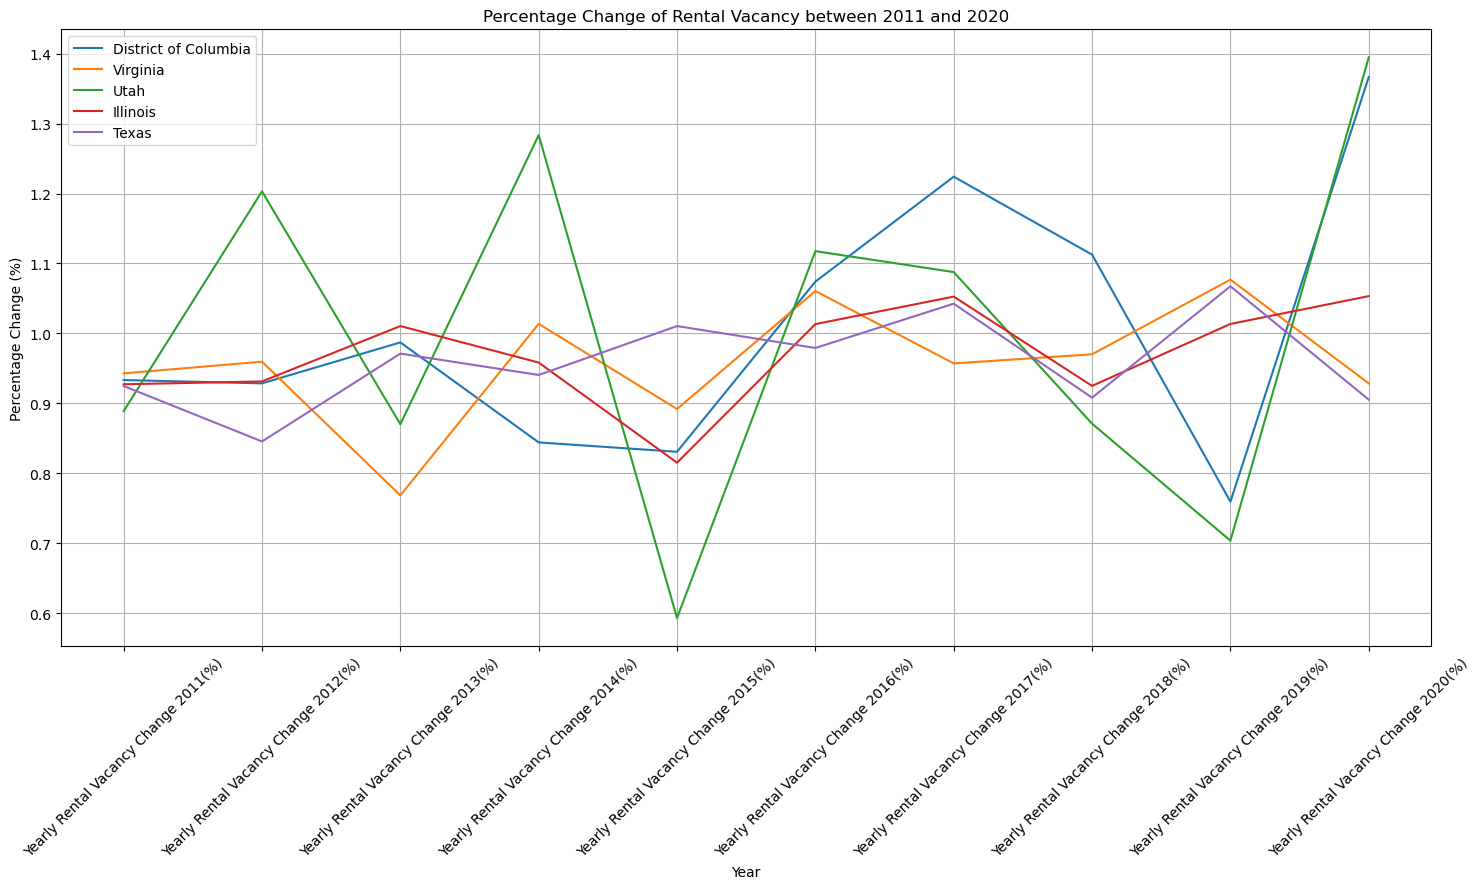

In [27]:
#plotting another graph to visualize the percentage change to see which years had the greatest and smallest changes for each state
plt.figure(figsize=(15, 9))


#Starting a for loop for each of the states in the dataframe
for state in rental_df['States']:
    
    #Filtering so the values are only in the row of the state we are looking at and storing this variable as state_data
    rental_data = rental_df[rental_df['States'] == state]
    
    
    #Plotting cell values using iloc and going through the row, skipping the first column 
    plt.plot(rental_data.columns[1:], rental_data.iloc[0, 1:], label=state)
    
    
#Adding a title, axis labels, and parameters to make the graph look nicer    
plt.title('Percentage Change of Rental Vacancy between 2011 and 2020')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

#saving the figure as a png file 
plt.savefig("rentalvacancygraphs/Fig2.png")

#show the graph
plt.show()

In [28]:
#Renaming these files to avoid duplicates 
state_rental_df = states_df3

per_rental_df = rental_df

In [29]:
#Storing the two dataframes that we created to use in a different python file
 
%store state_rental_df
%store per_rental_df

Stored 'state_rental_df' (DataFrame)
Stored 'per_rental_df' (DataFrame)
